In [15]:
# Logistic regression
import numpy as np
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[0:100,0:2]
y = y[0:100]

# move one point away from the border to illustrate a case with good separation
X[X[:,0]==4.5,:]=np.array([4.5,3.5])

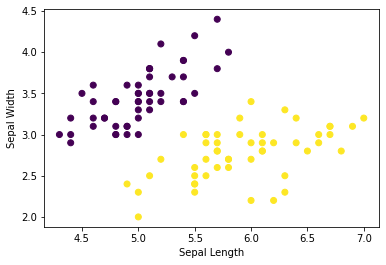

In [16]:
import matplotlib.pyplot as plt

# Plot the data and the classification with the decision boundary.
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()


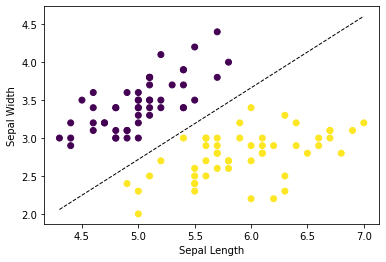

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# prepare the points for drawing the linear boundary
xmin, xmax = min(X[:,0]), max(X[:,0])
ymin, ymax = min(X[:,1]), max(X[:,1])
xd = np.array([xmin, xmax])
yd = m*xd + c

# replot, but now with the boundary
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.show()

In [18]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [19]:
# from VanDerPlas book

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

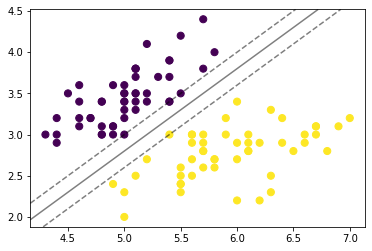

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model);

In [9]:
model.support_vectors_

array([[5. , 3. ],
       [5.5, 3.5],
       [5.4, 3. ]])

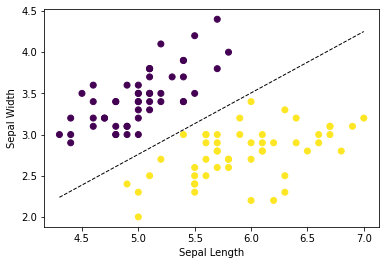

In [10]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# prepare the points for drawing the linear boundary
xmin, xmax = min(X[:,0]), max(X[:,0])
ymin, ymax = min(X[:,1]), max(X[:,1])
xd = np.array([xmin, xmax])
yd = m*xd + c

# replot, but now with the boundary
plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.show()

/Users/paularibeiro/.virtualenvs/bino/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


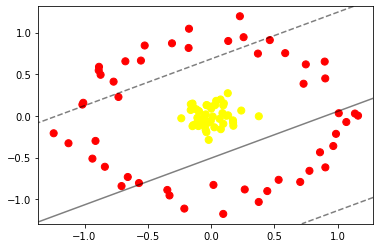

In [11]:
# from van der Plas, an example with a non-linear kernel

from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

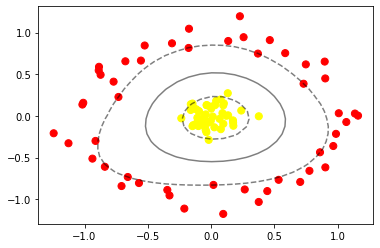

In [12]:
# All it takes is to change the kernel

clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

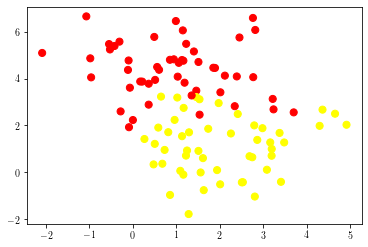

In [67]:
# from van der Plas, an example without a clear separation
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

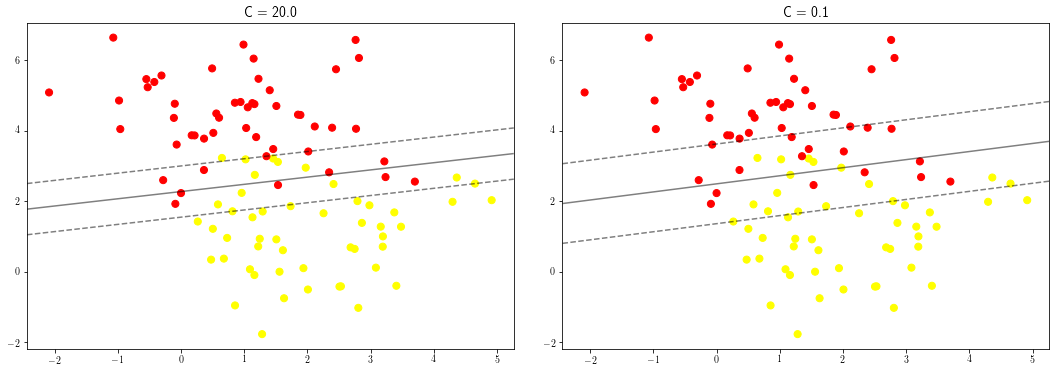

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [20.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

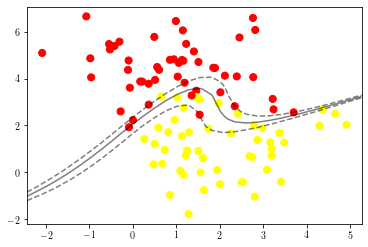

In [74]:
# we can also try a different kernel on this data

clf = SVC(kernel='poly',gamma=1).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);